In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate
from src import camvid
from src import evaluate
from src import predict
from src.tiramisu import tiramisu
from src.wrappers import MonteCarlo
%matplotlib inline
plt.style.use('dark_background')

Using TensorFlow backend.


In [2]:
# the location to save fine training weights to
weights = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


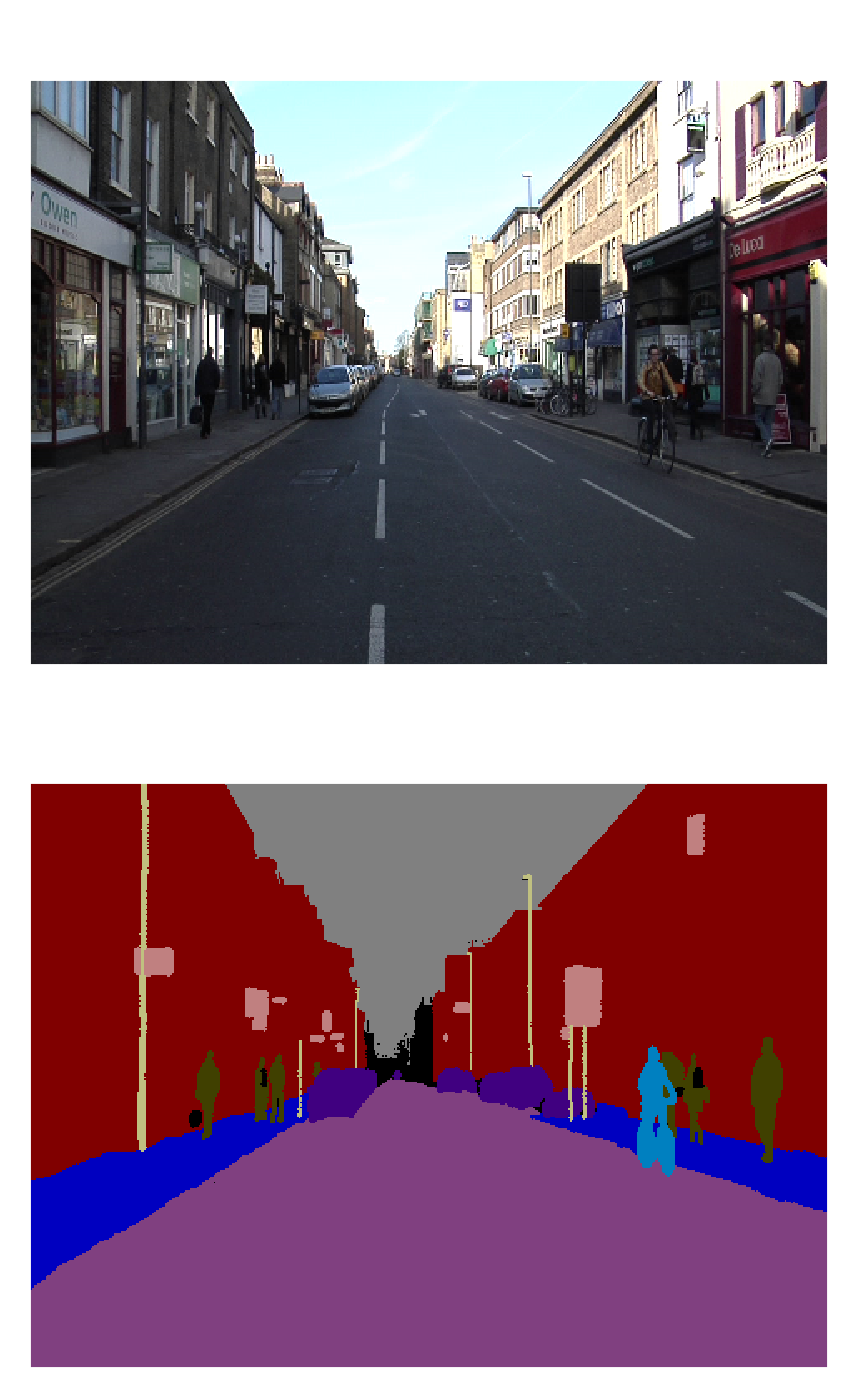

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = tiramisu.tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask, mc_dropout=True)
model.load_weights(weights)

# Test Metrics

In [7]:
# wrap the model with the test time Monte Carlo
model = MonteCarlo(model, 40, uncertainty='entropy')

In [8]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    label_map=camvid11.label_to_discrete_map
)
metrics

100%|██████████| 233/233 [26:54<00:00,  6.93s/step]


Test
Accuracy                 0.906514
Mean Per Class Accuracy  0.696365
Mean I/U                 0.573876
Bicyclist                0.360573
Building                 0.773785
Car                      0.660285
Column_Pole              0.288679
Fence                    0.190006
Pedestrian               0.442884
Road                     0.914561
Sidewalk                 0.804569
SignSymbol               0.226553
Sky                      0.923846
VegetationMisc           0.726899

In [9]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.906514 |
| Mean Per Class Accuracy | 0.696365 |
| Mean I/U                | 0.573876 |
| Bicyclist               | 0.360573 |
| Building                | 0.773785 |
| Car                     | 0.660285 |
| Column_Pole             | 0.288679 |
| Fence                   | 0.190006 |
| Pedestrian              | 0.442884 |
| Road                    | 0.914561 |
| Sidewalk                | 0.804569 |
| SignSymbol              | 0.226553 |
| Sky                     | 0.923846 |
| VegetationMisc          | 0.726899 |


# Qualitative Results

## Train

In [10]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

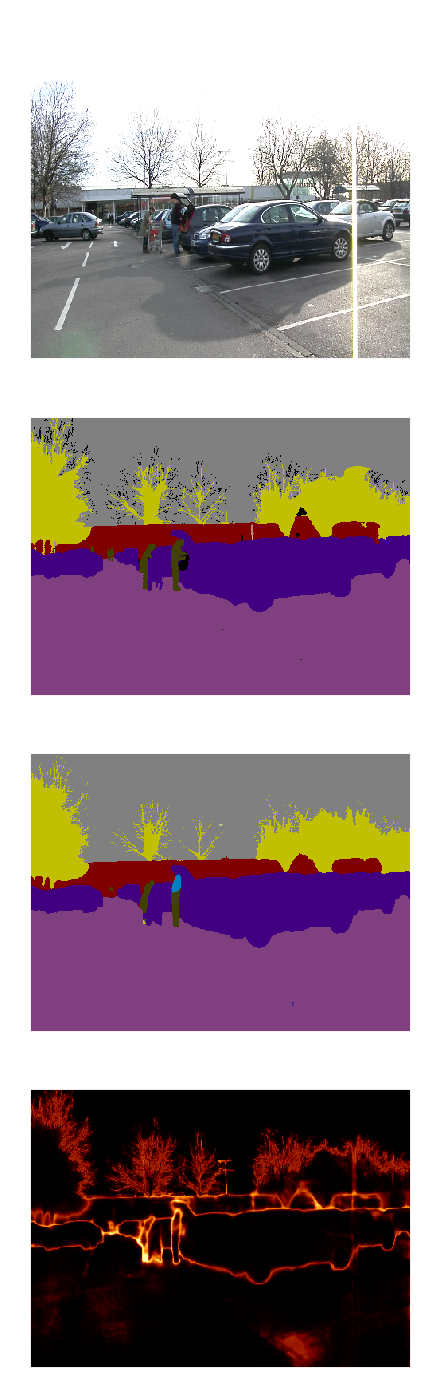

In [11]:
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

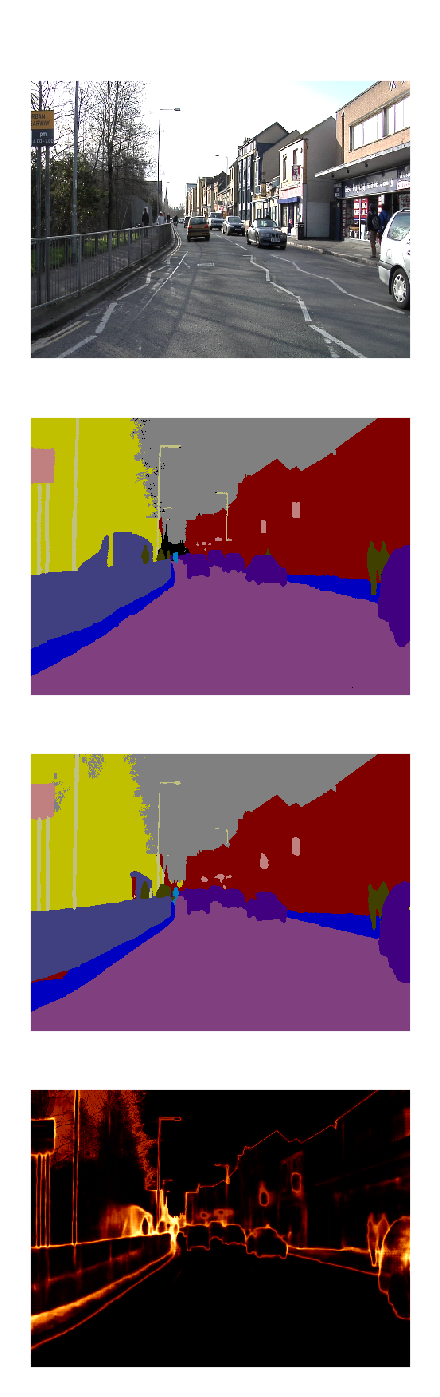

In [12]:
camvid.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

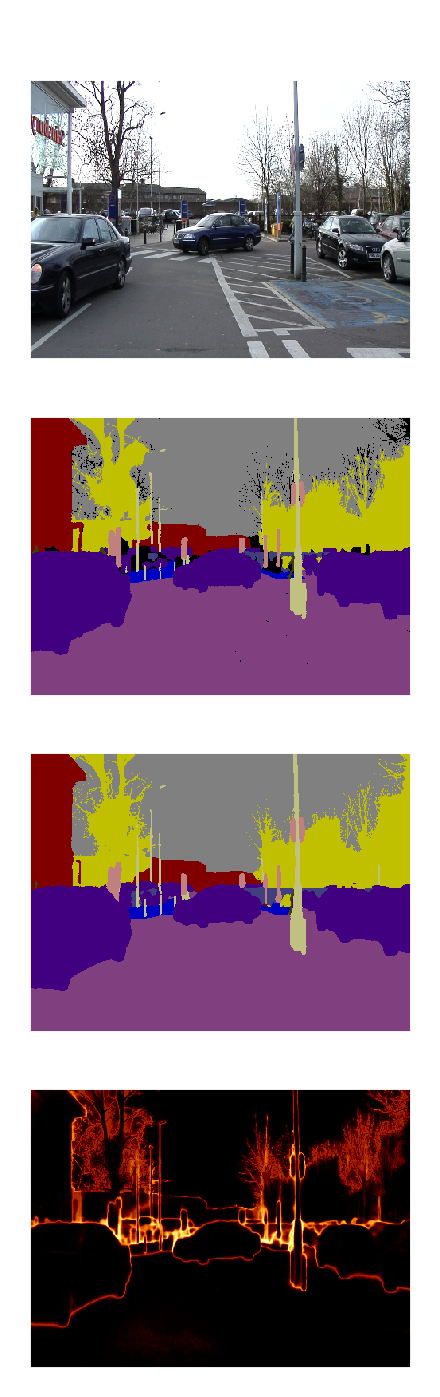

In [13]:
camvid.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

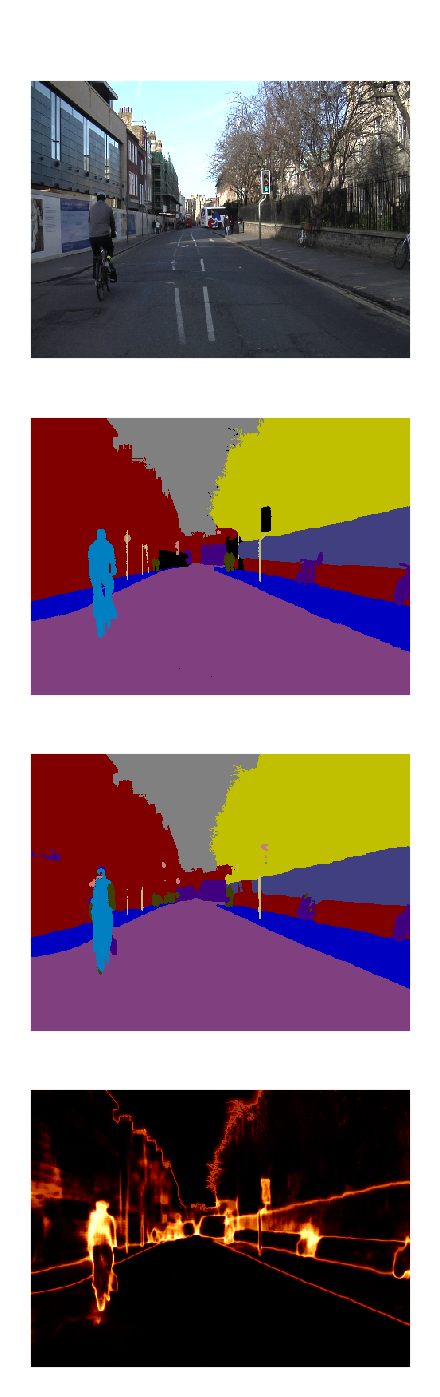

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

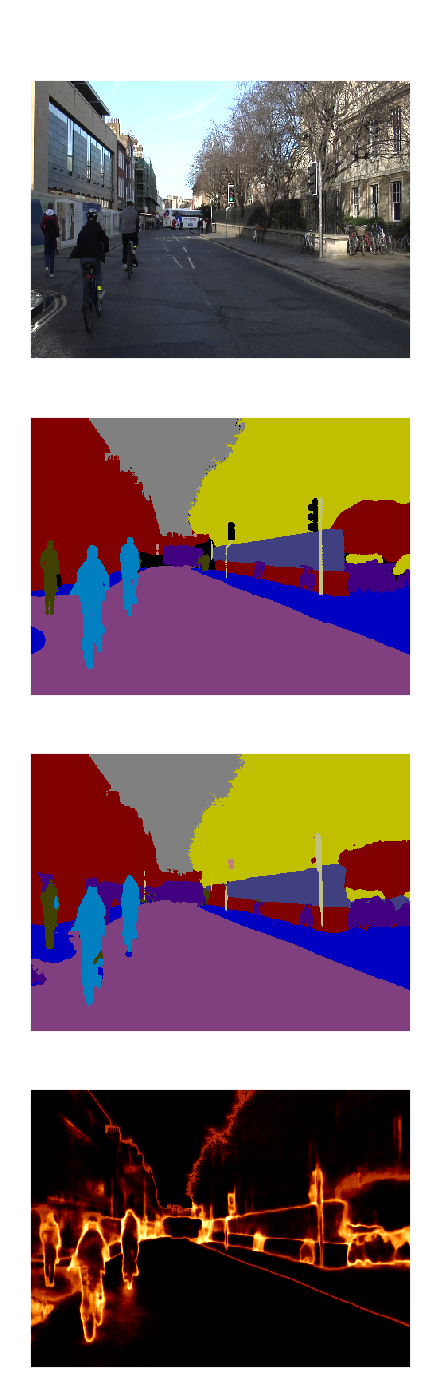

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

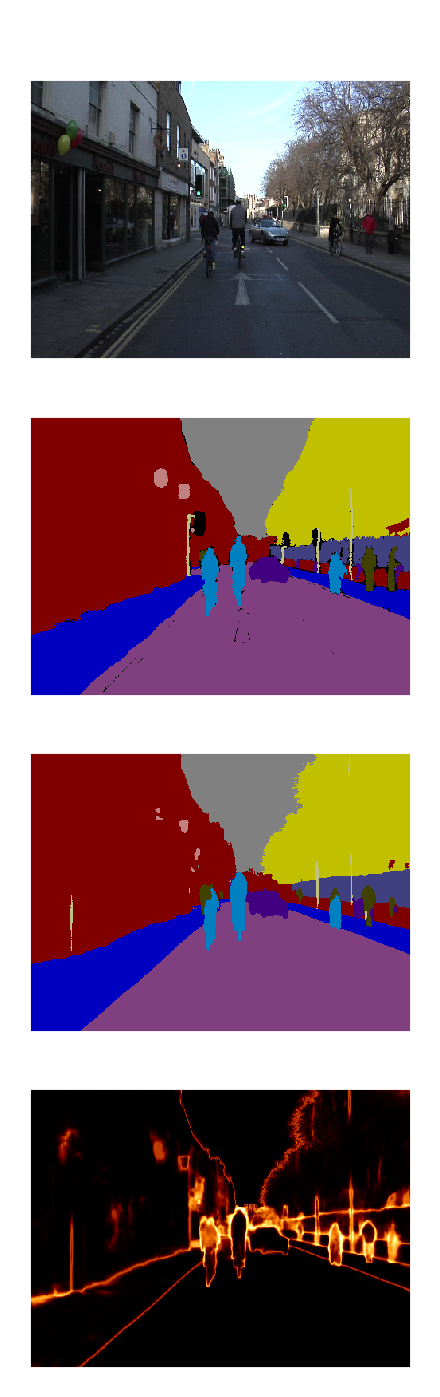

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

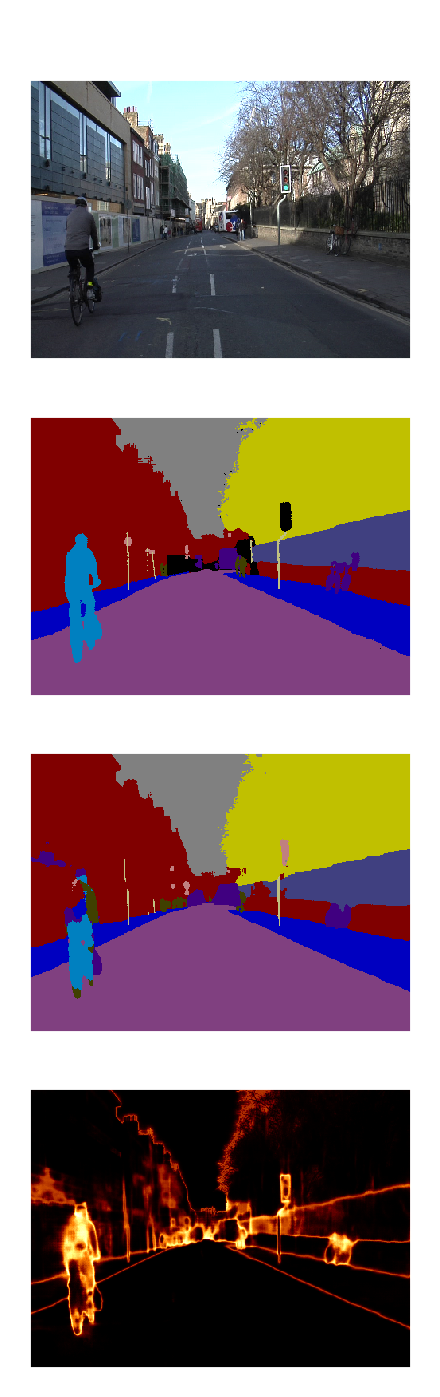

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

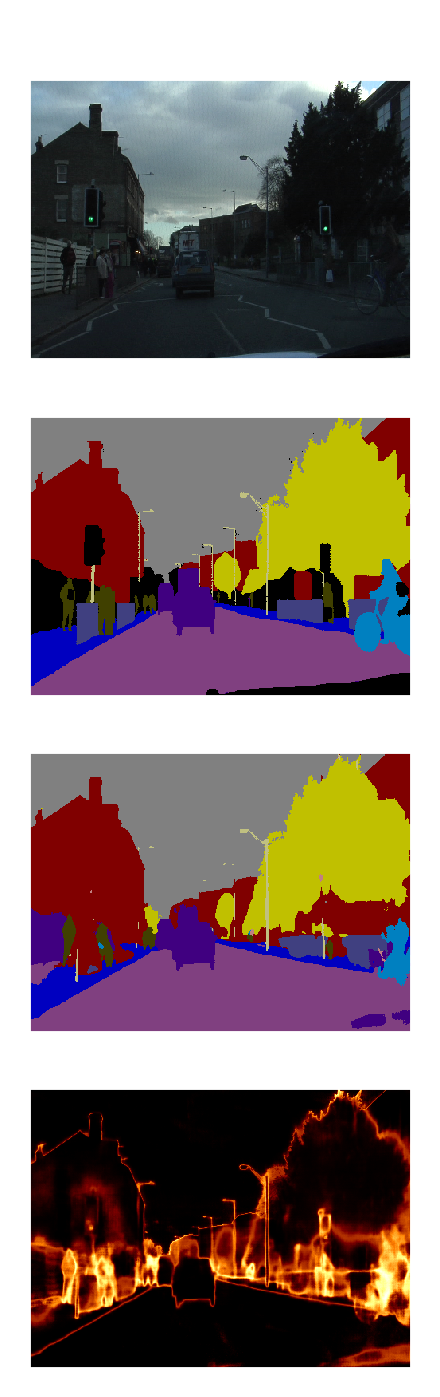

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

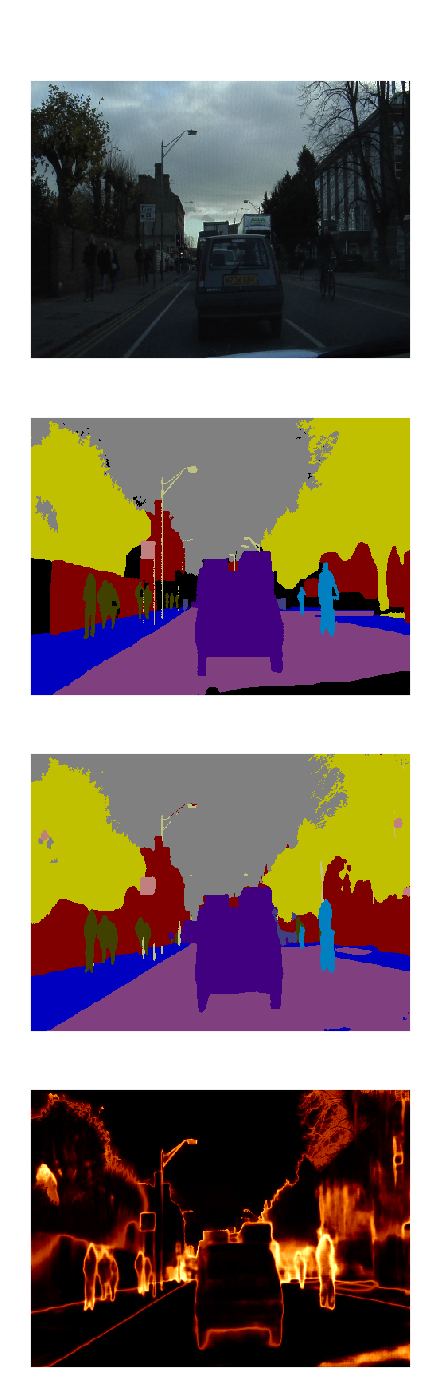

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

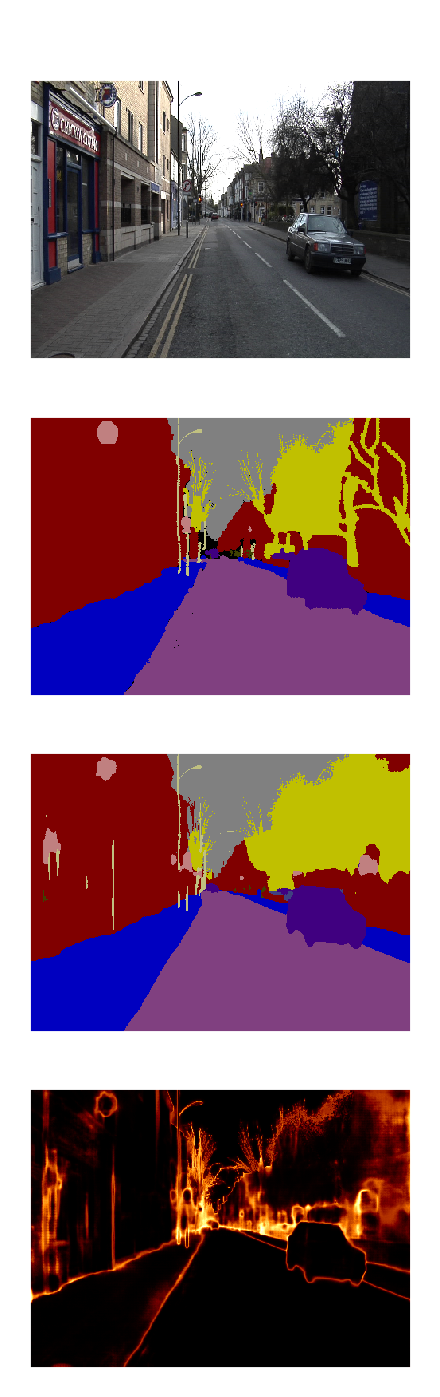

In [20]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

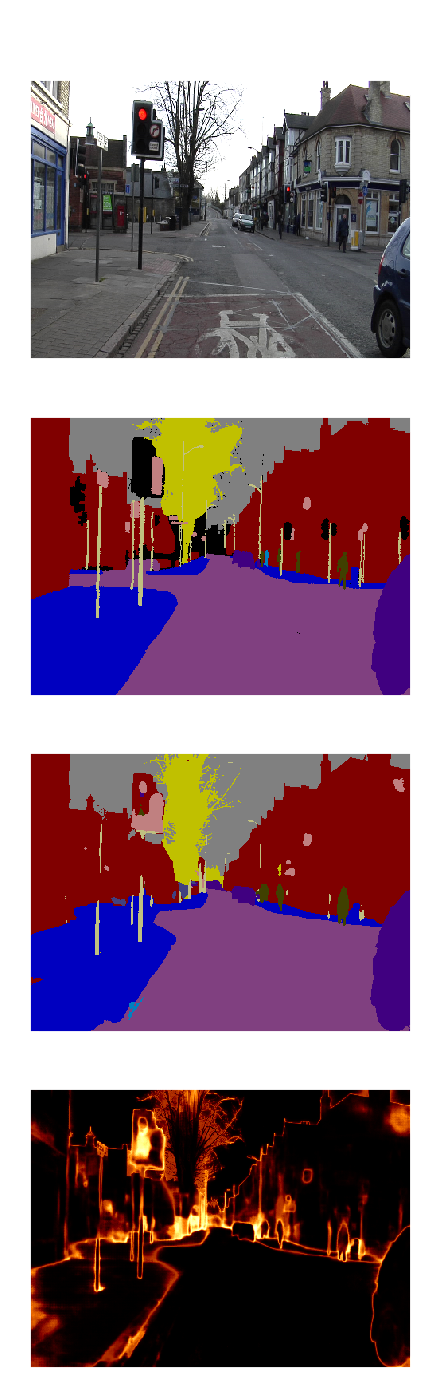

In [21]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])